# Missing Data

In [5]:
import numpy as np
import pandas as pd

n = 8
np.random.seed(42)
random_matrix = np.random.randint(1, 10, (n,n))   # array 8*8
random_matrix

array([[7, 4, 8, 5, 7, 3, 7, 8],
       [5, 4, 8, 8, 3, 6, 5, 2],
       [8, 6, 2, 5, 1, 6, 9, 1],
       [3, 7, 4, 9, 3, 5, 3, 7],
       [5, 9, 7, 2, 4, 9, 2, 9],
       [5, 2, 4, 7, 8, 3, 1, 4],
       [2, 8, 4, 2, 6, 6, 4, 6],
       [2, 2, 4, 8, 7, 9, 8, 5]])

In [6]:
random_matrix.shape

(8, 8)

In [7]:
random_matrix.size

64

In [8]:
np.random.choice(random_matrix.size)

# 从 0 到 random_matrix.size - 1 的范围内随机选取一个整数

15

In [9]:
np.random.seed(42)
index = np.random.choice(random_matrix.size, 10, replace=False)    # index是随机生成的
random_matrix = random_matrix * 1.0    # 数据类型（dtype）从整型 (int) 转换为浮点型 (float)
random_matrix.ravel()[index] = np.nan 
random_matrix

# ravel() :to 2D, 是 NumPy 中用来将多维数组展平（flatten）为一维数组的函数,会返回一个一维视图（如果可能），而不是创建数组的副本
# 将 NumPy 矩阵 random_matrix 展平为一维数组（使用 .ravel() 方法），并用 np.nan 替换指定索引 index 对应的元素 为 nan

# 从范围 [0, random_matrix.size-1] 中随机抽取 10 个索引。默认情况下，replace=True，因此抽取时是允许重复的。
# [index]：指定要修改的一维数组中的索引位置。[0, 63]
# replace=False 时，意味着无放回抽样：每次随机选择后，该值不能再次被选择。这确保了抽样结果中没有重复的值

array([[nan,  4.,  8.,  5.,  7., nan,  7.,  8.],
       [ 5.,  4.,  8.,  8., nan,  6.,  5.,  2.],
       [nan,  6.,  2.,  5.,  1.,  6.,  9.,  1.],
       [ 3., nan,  4.,  9.,  3.,  5.,  3.,  7.],
       [ 5.,  9.,  7.,  2., nan,  9.,  2.,  9.],
       [ 5.,  2.,  4.,  7., nan,  3.,  1.,  4.],
       [ 2.,  8.,  4.,  2., nan,  6.,  4.,  6.],
       [ 2.,  2., nan,  8.,  7., nan,  8.,  5.]])

In [10]:
scores = pd.DataFrame(random_matrix)
scores

,0,1,2,3,4,5,6,7
0,NaN,4.0,8.0,5.0,7.0,NaN,7.0,8.0
1,5.0,4.0,8.0,8.0,NaN,6.0,5.0,2.0
2,NaN,6.0,2.0,5.0,1.0,6.0,9.0,1.0
3,3.0,NaN,4.0,9.0,3.0,5.0,3.0,7.0
4,5.0,9.0,7.0,2.0,NaN,9.0,2.0,9.0
5,5.0,2.0,4.0,7.0,NaN,3.0,1.0,4.0
6,2.0,8.0,4.0,2.0,NaN,6.0,4.0,6.0
7,2.0,2.0,NaN,8.0,7.0,NaN,8.0,5.0


In [11]:
# 设置 列名和行名

scores = pd.DataFrame(
    random_matrix,
    index=[f"Player {i}" for i in range(1, n + 1)],
    columns=[f"Round {i}" for i in range(1, n + 1)],
)
scores

,Round 1,Round 2,Round 3,Round 4,Round 5,Round 6,Round 7,Round 8
Player 1,NaN,4.0,8.0,5.0,7.0,NaN,7.0,8.0
Player 2,5.0,4.0,8.0,8.0,NaN,6.0,5.0,2.0
Player 3,NaN,6.0,2.0,5.0,1.0,6.0,9.0,1.0
Player 4,3.0,NaN,4.0,9.0,3.0,5.0,3.0,7.0
Player 5,5.0,9.0,7.0,2.0,NaN,9.0,2.0,9.0
Player 6,5.0,2.0,4.0,7.0,NaN,3.0,1.0,4.0
Player 7,2.0,8.0,4.0,2.0,NaN,6.0,4.0,6.0
Player 8,2.0,2.0,NaN,8.0,7.0,NaN,8.0,5.0


## Missing Data

- None - pythonic missing data, python object, not use in numpy and pandas
- NaN - floating point Not a number, support fast operations. All arithmetic operations with NaN will result in a nan, use in numpy and pandas.
- NA/ pd.NA - be used consistently across data types so this is pandas version of not the number       
跨数据类型一致使用，因此这是 pandas 版本的非数字

Pandas
- is null() - return true if value is null
- notnull() / notna() - return true if value not null
- dropna() - drops whole axis with nulls. 默认 axis=0 ，删除有 nan 的整行 row ; axis=1 ，删除有 nan 的整列 column .
- fillna() - fills null values with certain balue

In [12]:
scores.isnull()

,Round 1,Round 2,Round 3,Round 4,Round 5,Round 6,Round 7,Round 8
Player 1,True,False,False,False,False,True,False,False
Player 2,False,False,False,False,True,False,False,False
Player 3,True,False,False,False,False,False,False,False
Player 4,False,True,False,False,False,False,False,False
Player 5,False,False,False,False,True,False,False,False
Player 6,False,False,False,False,True,False,False,False
Player 7,False,False,False,False,True,False,False,False
Player 8,False,False,True,False,False,True,False,False


In [13]:
scores.notnull()

,Round 1,Round 2,Round 3,Round 4,Round 5,Round 6,Round 7,Round 8
Player 1,False,True,True,True,True,False,True,True
Player 2,True,True,True,True,False,True,True,True
Player 3,False,True,True,True,True,True,True,True
Player 4,True,False,True,True,True,True,True,True
Player 5,True,True,True,True,False,True,True,True
Player 6,True,True,True,True,False,True,True,True
Player 7,True,True,True,True,False,True,True,True
Player 8,True,True,False,True,True,False,True,True


In [14]:
scores.notna()

# = scores.notnull(), interchangeably 可以互换

,Round 1,Round 2,Round 3,Round 4,Round 5,Round 6,Round 7,Round 8
Player 1,False,True,True,True,True,False,True,True
Player 2,True,True,True,True,False,True,True,True
Player 3,False,True,True,True,True,True,True,True
Player 4,True,False,True,True,True,True,True,True
Player 5,True,True,True,True,False,True,True,True
Player 6,True,True,True,True,False,True,True,True
Player 7,True,True,True,True,False,True,True,True
Player 8,True,True,False,True,True,False,True,True


In [15]:
scores.dropna()   # 默认 axis=0 ， 删除有 nan 的整行

,Round 1,Round 2,Round 3,Round 4,Round 5,Round 6,Round 7,Round 8


In [16]:
scores.dropna(axis=1)  # axis=1 ， 删除有 nan 的整列

,Round 4,Round 7,Round 8
Player 1,5.0,7.0,8.0
Player 2,8.0,5.0,2.0
Player 3,5.0,9.0,1.0
Player 4,9.0,3.0,7.0
Player 5,2.0,2.0,9.0
Player 6,7.0,1.0,4.0
Player 7,2.0,4.0,6.0
Player 8,8.0,8.0,5.0


In [17]:
scores.fillna(0)    # 赋值给 nan 的值 为0

,Round 1,Round 2,Round 3,Round 4,Round 5,Round 6,Round 7,Round 8
Player 1,0.0,4.0,8.0,5.0,7.0,0.0,7.0,8.0
Player 2,5.0,4.0,8.0,8.0,0.0,6.0,5.0,2.0
Player 3,0.0,6.0,2.0,5.0,1.0,6.0,9.0,1.0
Player 4,3.0,0.0,4.0,9.0,3.0,5.0,3.0,7.0
Player 5,5.0,9.0,7.0,2.0,0.0,9.0,2.0,9.0
Player 6,5.0,2.0,4.0,7.0,0.0,3.0,1.0,4.0
Player 7,2.0,8.0,4.0,2.0,0.0,6.0,4.0,6.0
Player 8,2.0,2.0,0.0,8.0,7.0,0.0,8.0,5.0


## Missing data strategy - discuss with domain expert

- dataset size
    - small dataset - more carefull with data
    - large dataset and few nulls - higher chance to remove nulls
- impute missing value: 推算 nan 值， 有时候可能是 mean()
- domain knowledge - how to fill data
    - e.g. score missing value -> 0
    - e.g. missing value in a column could be filled with mean or median
    - missing values between two points -> interpolate in between
    - regression to fill missing value
- note missing data can negatively impact:
    - data visualization
    - arithmetic computations and summary statistics
    - machine learning algorithms        
                 
- 数据集大小
    - 小数据集 - 更谨慎地处理数据
    - 大数据集且空值很少 - 删除空值的几率更高
- 估算缺失值：推算 nan 值，有时候可能是 mean()
- 领域知识 - 如何填充数据
    - 例如，将缺失值评分为 -> 0
    - 例如，列中的缺失值可以用平均值或中位数填充
    - 两点之间的缺失值 -> 在两者之间进行插值
    - 回归以填充缺失值
- 注意，缺失数据可能会产生负面影响：
    - 数据可视化
    - 算术计算和汇总统计
    - 机器学习算法


# seaborn

- 它有个库有很多数据集，里面很多数据文档，可以直接 sns.load_dataset("titanic") 调用。
- 网址： https://github.com/mwaskom/seaborn-data/blob/master/titanic.csv

- searh "seaborn load dataset" in google ,then find the seaborn github - mwaskom - seaborn-data 数据源
- have lots of datasets for visualizatin test it out or mchine learning.
- eg. titanic 泰坦尼克

In [18]:
import seaborn as sns

titanic = sns.load_dataset("titanic")   # Dataframe
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [19]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [20]:
titanic.isnull().sum()

# .sum() 会计算每一列中缺失值（True）的总数

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

<Axes: xlabel='age', ylabel='Count'>

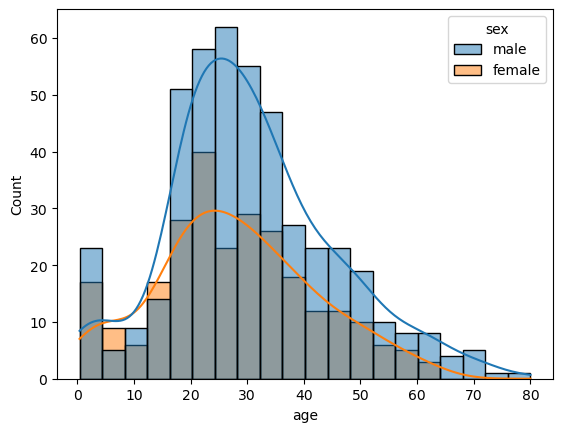

In [21]:
# 直方图（Histogram）, 核密度估计图（KDE）Kernel Density Estimation）
#核密度估计是一种平滑的概率密度函数，用曲线表示变量的分布，而不是用离散的柱形图。
# 加上 kde=True 参数后，会在直方图上叠加一条平滑的分布曲线，表示数据的密度分布.
# 设置 kde=False 的效果是 只绘制直方图，不显示核密度估计 (KDE) 曲线。
# hue="sex": 按照乘客的性别（sex 列）分组，并用不同的颜色显示每个组的数据。男性和女性乘客的年龄分布将以不同颜色的直方图和 KDE 曲线呈现

sns.histplot(data = titanic, x = 'age', kde=True, hue="sex")

- 灰色部分其实是默认的柱状图叠加效果导致的，它表示 两个类别（男和女）柱子的重叠区域。这种效果是 seaborn.histplot() 的默认行为，因为它的柱状图在堆叠时并没有设置透明度或分层方式，从而在两个类别的数据重叠的地方显示为灰色。

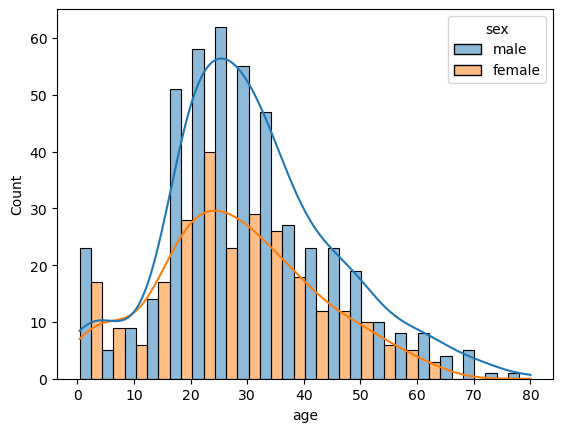

In [22]:
# - 解决方案：调整柱状图的堆叠模式，可以使用 multiple="dodge" 参数，让柱状图的柱子并排显示，而不是默认的堆叠形式
# multiple="dodge"：表示分组后直方图的条形在 x 轴上并排显示（而不是堆叠）。

import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=titanic, x='age', kde=True, hue="sex", multiple="dodge")
plt.show()

In [23]:
titanic["sex"].value_counts()

sex
male      577
female    314
Name: count, dtype: int64

In [24]:
# imagine that we have talked to a historian and this person advices us to use 
# median age of corresponding gender to fill in the missing age 
# 想象一下，我们与一位历史学家交谈，这个人建议我们使用, 相应性别的中位年龄来填补缺失的年龄.

In [25]:
# 方法 一
median_male_age = titanic[titanic["sex"] == "male"]["age"].median()
median_male_age

29.0

In [26]:
# 方法 二
median_female_age = titanic.query("sex== 'female'")["age"].median()
median_female_age


27.0

In [27]:
# 男性的 nan值都改成 中间值 并更新 titanic
titanic.loc[titanic["sex"] == "male", "age"] = titanic.loc[titanic["sex"] == "male", "age"].fillna(median_male_age)
titanic["age"].head(6)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5    29.0
Name: age, dtype: float64

In [28]:
titanic.loc[titanic["sex"] == "female", "age"] = titanic.loc[titanic["sex"] == "female", "age"].fillna(median_female_age)
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

<Axes: xlabel='age', ylabel='Count'>

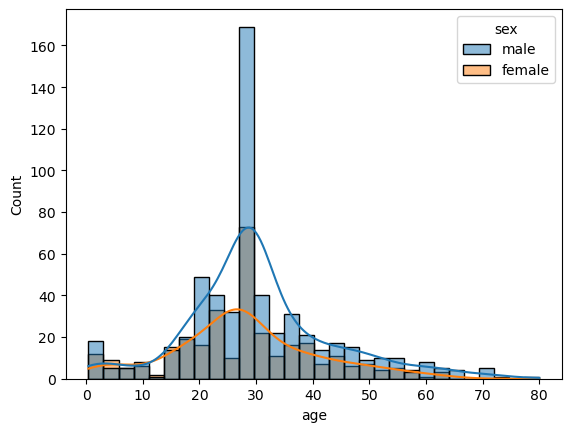

In [29]:
sns.histplot(data=titanic, x = "age", kde=True, hue = "sex")

## Aggregations and groupby 聚合 分组

- min max .....

In [35]:
survivors = titanic.groupby("sex")[["survived", "age"]].mean()
survivors

# 以 sex 分组，取 survived, age 这两列的 平均值 
# [[]]: 两对方括号 [[]] ,这是显式地选择 多个列，返回一个 Pandas DataFrame 对象.
# 单对 []:一个单独的列，返回的是一个 Pandas Series 对象

# survived 列：表示存活率（0~1）。
# 女性的存活率是 0.666667（即 2/3 女性幸存）。
# 男性的存活率是 0（没有幸存）。

,survived,age
sex,,
female,0.742038,27.761146
male,0.188908,30.355581


In [36]:
survivors = titanic.groupby("sex")[["survived", "age"]].mean()   
for i in survivors.index:
    survived_percentage = survivors.loc[i, "survived"]*100
    print(f"Percentage survived {i}: {survived_percentage:.1f}")

# df.loc[rows, columns] ：表示根据当前的索引 i，获取 survived 列的值

Percentage survived female: 74.2
Percentage survived male: 18.9


In [32]:
titanic.groupby("class", observed=True)[["age","fare"]].max()

# observed=True：只保留数据中实际出现的分组组合。会提高性能，减少内存开销。
# observed=False（默认值）：包含所有可能的分组组合（即便某些组合没有对应的数据）

,age,fare
class,,
First,80.0,512.3292
Second,70.0,73.5000
Third,74.0,69.5500


In [33]:
titanic.groupby("survived")["sex"].value_counts()

# 1. 将 Titanic 数据集按 survived 列的值进行分组。
# 2. 从分组后的数据中选择 sex 列。这样我们就只关注性别列，而不是其他列。
# 3. value_counts(): 对每个分组中的 sex 列，计算各个性别（如 male 和 female）出现的次数.

survived  sex   
0         male      468
          female     81
1         female    233
          male      109
Name: count, dtype: int64

### agg() 
- you can put in different type od aggregations, don't need to use the same aggregation for each column.

In [34]:


titanic.groupby("survived").agg(dict(age="mean", fare = "median"))

# agg(): Pandas 中用于对 DataFrame 或 Series 进行聚合操作的方法。你可以传入不同的聚合函数来处理各个列。
# dict(age="mean", fare="median")：通过字典的形式指定不同列使用的聚合函数：
# 对 age 列应用 平均值（mean） 聚合。对 fare 列应用 中位数（median） 聚合。

,age,fare
survived,,
0,30.193989,10.5
1,28.232953,26.0
